In [2]:
import numpy as np
import skrf as rf
import matplotlib.pyplot as plt
import pandas as pd
from pylab import *
from ast import literal_eval

from tensorflow.python.keras.saving.save import load_model


import antenna_boundary_position as po
import signal_process as sp
import data_prepare as dp
import learning_model as lm

In [3]:
pos_file='./20200309-AS-CNC-Boundary-Movement/LogPeriodic/AntennaPositions.csv'

In [4]:
'''
#prepare dataset as input for LSTM
#signal_col=dp.signal_col_lstm() #the first column of df, reflection signal sequences
#reflection_col=dp.reflection_time_column_lstm() # the second column of df, reflection time from antenna position to boundary
signal_ret=dp.signal_col_lstm_16()
reflection_ret=dp.reflection_col_lstm_16()

for index in range(16):
    signal_col=signal_ret[index] #the first column of df, reflection signal sequences

    #do normalization for each reflection list
    #the second column of df, reflection time from antenna position to boundary
    reflection_col=dp.normalization(reflection_ret[index])  

    df_learning={'signal_timesteps':signal_col,'reflection_value':reflection_col}
    df_learning_file=pd.DataFrame(df_learning)
'''

"\n#prepare dataset as input for LSTM\n#signal_col=dp.signal_col_lstm() #the first column of df, reflection signal sequences\n#reflection_col=dp.reflection_time_column_lstm() # the second column of df, reflection time from antenna position to boundary\nsignal_ret=dp.signal_col_lstm_16()\nreflection_ret=dp.reflection_col_lstm_16()\n\nfor index in range(16):\n    signal_col=signal_ret[index] #the first column of df, reflection signal sequences\n\n    #do normalization for each reflection list\n    #the second column of df, reflection time from antenna position to boundary\n    reflection_col=dp.normalization(reflection_ret[index])  \n\n    df_learning={'signal_timesteps':signal_col,'reflection_value':reflection_col}\n    df_learning_file=pd.DataFrame(df_learning)\n"

In [5]:
dataset_name=['data_for_lm_S11.csv','data_for_lm_S22.csv','data_for_lm_S33.csv','data_for_lm_S44.csv','data_for_lm_S55.csv',
              'data_for_lm_S66.csv','data_for_lm_S77.csv','data_for_lm_S88.csv','data_for_lm_S99.csv','data_for_lm_S1010.csv',
              'data_for_lm_S1111.csv','data_for_lm_S1212.csv','data_for_lm_S1313.csv','data_for_lm_S1414.csv','data_for_lm_S1515.csv','data_for_lm_S1616.csv']

In [6]:
#lstm trained model
model_name=['lstm_disS11.h5','lstm_disS22.h5','lstm_disS33.h5','lstm_disS44.h5','lstm_disS55.h5',
            'lstm_disS66.h5','lstm_disS77.h5','lstm_disS88.h5','lstm_disS99.h5','lstm_disS1010.h5',
            'lstm_disS1111.h5','lstm_disS1212.h5','lstm_disS1313.h5','lstm_disS1414.h5','lstm_disS1515.h5','lstm_disS1616.h5']

In [7]:
#test file path
test_file_name=['./20200309-AS-CNC-Boundary-Movement/LogPeriodic/Container1/Data/IF10k-CNC-Exp0000.s16p',
                './20200309-AS-CNC-Boundary-Movement/LogPeriodic/Container1/Data/IF10k-CNC-Exp0030.s16p',
                './20200309-AS-CNC-Boundary-Movement/LogPeriodic/Container1/Data/IF10k-CNC-Exp0155.s16p',
                './20200309-AS-CNC-Boundary-Movement/LogPeriodic/Container1/Data/IF10k-CNC-Exp0237.s16p',
                './20200309-AS-CNC-Boundary-Movement/LogPeriodic/Container1/Data/IF10k-CNC-Exp0200.s16p']

In [10]:
#predict the distance for 16
prediction_list=dp.test_output(test_file_name[2],model_name)
print("prediction distances:",prediction_list)

prediction distances: [18.993137, 19.391928, 19.389462, 19.706362, 18.811892, 18.146627, 17.518675, 18.19286, 18.557354, 15.135794, 12.858959, 11.991917, 13.277435, 14.622543, 15.286851, 16.935022]


In [11]:
#converting to coordinate
coor_prediction_list=po.reflection_to_bound_point(pos_file,prediction_list)
print(coor_prediction_list)


[(0, 96.0068626403809), (30.1240767974988, 86.4602666924498), (53.3343948671284, 62.6860065521223), (66.2403255097417, 31.9474084479672), (71.1881084442139, 0), (67.7042569085390, -32.4856342167802), (54.7426476673966, -63.9175368211274), (30.6419882815877, -87.5417156879381), (0, -96.4426460266113), (-31.9624217169943, -90.2989077105128), (-58.2502937995004, -66.9850062299027), (-73.4863037170652, -34.5947586775377), (-76.7225646972656, 0), (-71.0145487132032, 33.6944091543625), (-56.4226747610249, 65.3867362561707), (-31.1852838600996, 88.6761691142193)]


In [12]:
#plot the prediction coordinates
position=po.antenna_pos(pos_file)
prediction_df=pd.DataFrame(coor_prediction_list)
print('the transformation points:',prediction_df)

the transformation points:                     0                  1
0                   0   96.0068626403809
1    30.1240767974988   86.4602666924498
2    53.3343948671284   62.6860065521223
3    66.2403255097417   31.9474084479672
4    71.1881084442139                  0
5    67.7042569085390  -32.4856342167802
6    54.7426476673966  -63.9175368211274
7    30.6419882815877  -87.5417156879381
8                   0  -96.4426460266113
9   -31.9624217169943  -90.2989077105128
10  -58.2502937995004  -66.9850062299027
11  -73.4863037170652  -34.5947586775377
12  -76.7225646972656                  0
13  -71.0145487132032   33.6944091543625
14  -56.4226747610249   65.3867362561707
15  -31.1852838600996   88.6761691142193


In [13]:
#the ground truth of boundary
bound_file='./20200309-AS-CNC-Boundary-Movement/LogPeriodic/Container1/GroundTruth/Exp0155.csv'
position2=po.boundary_pos(bound_file)

In [14]:
closet_coordinate=pd.DataFrame(po.bound_ante_point(pos_file,bound_file))
#print(po.bound_ante_point(pos_file,bound_file))

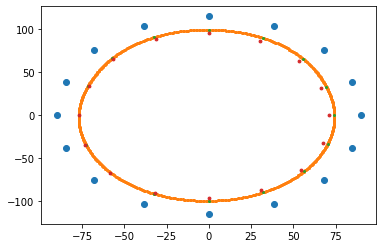

In [15]:
#plot
plt.scatter(position['x'],position['y'])
plt.scatter(position2['x'],position2['y'],s=4.)
plt.scatter(closet_coordinate[0],closet_coordinate[1],s=4.)
plt.scatter(prediction_df[0],prediction_df[1],s=8.)
plt.show()

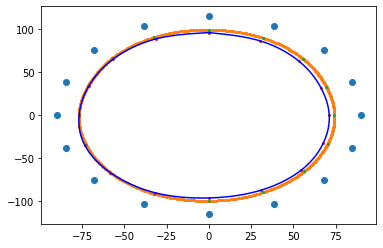

In [16]:
# the points array for bezier curve recunstruct
coor_prediction_list.append(po.reflection_to_bound_point(pos_file,prediction_list)[0])
#coor_prediction_array=np.array(coor_prediction_list)
#print(coor_prediction_array)
plt.scatter(position['x'],position['y'])
plt.scatter(position2['x'],position2['y'],s=4.)
plt.scatter(closet_coordinate[0],closet_coordinate[1],s=4.)
plt.scatter(prediction_df[0],prediction_df[1],s=4.)
po.curve_draw(coor_prediction_list)
plt.show()

In [16]:
#rmse

#all file path
snp_file_paths=dp.file_path_integration()[0]
gt_file_paths=dp.file_path_integration()[1]
'''
single_rmse=[]
for i in range(len(snp_file_paths)):
    ntwk=rf.Network(snp_file_paths[i])
    closet_coordinate=po.bound_ante_point(pos_file,gt_file_paths[i])
    prediction_dis=dp.test_output(snp_file_paths[i],model_name)
    coor_prediction=po.reflection_to_bound_point(pos_file,prediction_dis)
    accuracy=po.rmse(closet_coordinate,coor_prediction)
    single_rmse.append(accuracy)

print('the RMSE of boundary reconstruction is:', np.sum(single_rmse)/(i+1))
'''

"\nsingle_rmse=[]\nfor i in range(len(snp_file_paths)):\n    ntwk=rf.Network(snp_file_paths[i])\n    closet_coordinate=po.bound_ante_point(pos_file,gt_file_paths[i])\n    prediction_dis=dp.test_output(snp_file_paths[i],model_name)\n    coor_prediction=po.reflection_to_bound_point(pos_file,prediction_dis)\n    accuracy=po.rmse(closet_coordinate,coor_prediction)\n    single_rmse.append(accuracy)\n\nprint('the RMSE of boundary reconstruction is:', np.sum(single_rmse)/(i+1))\n"